# Qia Wang HW6

<h1 style="font-size: 32px; text-align: center;">Introduction to Computer Programming for the Physical Sciences</h1>
<h2 style="font-size: 24px; text-align: center;">Joseph F. Hennawi</h2>
<h3 style="font-size: 24px; text-align: center;">Winter 2024</h2>

<ul style="list-style: none;">
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Open a new Jupyter notebook</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Name your notebook with your name and Homework 1</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Open a Markdown cell at the top and write your name and Homework 1</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Open a Markdown cell before each problem and write e.g. Problem 1, Problem 2(a), etc.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Please abide by the <b><a href="https://github.com/enigma-igm/Phys29/blob/main/using_AI_tools.md">Policy and Guidelines on Using AI Tools</a></b></li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Once you finish the problems: 1) Restart the Python kernel and clear all cell outputs. 2) Rerun the notebook from start to finish so that all answers/outputs show up. 3) Save your notebook as a single .pdf file and upload it to Gradescope on Canvas by the deadline. <b>No late homeworks will be accepted except for illness accompanied by a doctor's note.</b></li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span> For parts of problems that require analytical solutions you can perform your calculations using a pencil and paper. Then  photograph your work and convert the photograph to a .pdf file using an online tool. Homework assignments can only be submitted as a single .pdf file, so you will also need to figure out how to concatenate your photo .pdf file and your notebook .pdf file into a single .pdf file that you can submit. Online websites can do this for you. Alternatively, you can code up the analytical solution to your problems in a notebook Markdown cell using the LaTeX mathematical rendering language. This is harder but a chatbot can help you learn it. </li>
</ul>

# Homework 6

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

## Problem 1: Bessel Functions
Bessel functions $J_n(x)$, where $n$ is a non-negative integer (called the *order* of the Bessel function), are important functions in physics that appear in diffraction theory involving circular apertures and also in potential theory and wave theory in cylindrical polar coordinates. They have an integral representation given by
$$
J_n(x) = \frac{1}{\pi} \int_0^\pi \cos(n \theta - x\sin \theta) d\theta.
$$

**a)** Write a function `bessel_integrand` consistent with the following docstring: 
```python
    def bessel_integrand(theta, n, x):
        """
        Returns the integrand of the Bessel function integral.
        
        Parameters
        ----------
        theta : float or array_like
            The angle in radians.
        n : int
            The order of the Bessel function.
        x : float 
            The argument of the Bessel function.

        Returns
        -------
        J_n(x): float or array_like
            The value of the integrand at the given theta, x, and n.
        """
``` 
Plot the integrand as a function of $\theta$ over the range $0 \le \theta \le \pi$ for $n=1$ and $x=0$, $x=4$, and $x=10$. Repeat, and make the same plots for $n=1$. 

**b)** Modify the `trapezoidal_rule` function from lecture to be consistent with the following docstring:
```python
    def trapezoidal_rule(func, a, b, Ntrap, args=None, plot=True):
        """
        Compute the integral of func(x, *args) over the interval [a, b] using the trapezoidal rule.

        Parameters
        ----------
        func : callable 
            The function to integrate. The first argument of this function must be the variable of 
            integration, i.e. f = func(x, *args). The other arguments are passed through the args 
            parameter.
        a : float
            The lower limit of integration.
        b : float
            The upper limit of integration.
        Ntrap : int
            The number of trapezoidal subintervals to use. 
        args : tuple, optional
            Extra arguments besides the integration variable to pass to the function being
            integrated. 
        plot : bool, optional
            If True, plot the function func(x) over the interval [a, b] as well as the 
            trapezoids used to compute the trapezoidal rule. Default is True.

    Returns
    -------
    answer : float
        The estimate of the integral of func(x) over the interval [a, b].

    """        
```
In other words, add the optional `args` parameter to allow passing additional arguments to the function `func` being integrated. Note that in python the `*args` syntax allows you to pass a variable number of arguments to a function, i.e. 
```python
args = (n, x)
bessel_answer = bessel_integrand(theta, *args)
```
is equivalent to 
```python
bessel_answer = bessel_integrand(theta, n, x)
```
This usage for `trapezoidal_rule` is thus analogous to how the `quad` function in `scipy.integrate` works. 

Using this modified `trapezoidal_rule` function, compute $J_0(x)$ for $x = 0$, $x=4$, and $x=10$ using `Ntrap=12`. Repeat for $J_1(x)$ and the same set of $x$ values. Use the `plot=True` option and run each in a separate notebook cell so that you can visualize the trapezoidal partitioning for each integral.  Verify that your answers are correct by comparing to the `scipy.special.jn(n,x)` function.

**c)** Write a program to compute $J_1(x)$ using the `scipy.integrate.quad` function consistent with the following docstring

```python 
def bessel_jn(n, x):
    """
    Returns the Bessel function J_n(x) computed from the scipy.integrate.quad function.

    Parameters
    ----------
    n : int
        The order of the Bessel function.
    x : float 
        The argument of the Bessel function.
    
    Returns
    -------
    J_n(x) : array_like
        The value of the Bessel function at the given x and n.
    """
```


**d**) Using your function `bessel_jn`, evaluate $J_0(x)$ on a grid of 100 linearly spaced points in the range $0 \le x \le 10$ and store the results in a `numpy` array. Compute the truth using the `scipy.special.jn(n,x)` on the same grid of $x$ values and store the results in a `numpy` array. Compute the absolute error
$$
\epsilon(x) = |J_0(x) - \text{scipy.special.jv}(0,x)|
$$
and store in a `numpy` array called `epsilon_quad`. Print the values `np.min(epsilon_quad)` and `np.max(epsilon_quad)` to the screen.

**e)** Repeat part **d)** but now instead of integrating with `scipy.integrate.quad`, use your `trapzoidal_rule` function to compute $J_0(x)$ on the same grid of 100 linearly spaced $x$-values in the range $0 \le x \le 10$. (Make sure you set `plot=False`!). Compute the absolute error $\epsilon(x)$ and store in a `numpy` array called `epsilon_trapz`. Print the values `np.min(epsilon_trapz)` and `np.max(epsilon_trapz)` to the screen. 

**f)**  Make a **two panel** plot with a shared $x$-axis. In the top panel, plot three curves: 1) $J_0(x)$ computed using `scipy.integrate.quad` 2) $J_0(x)$ using the `trapezoidal_rule` function, and 3) $J_0(x)$ from the `scipy.special.jv(n,x)`. Evaluate all three on the same grid of 100 linearly spaced points in the range $0 \le x \le 10$. In the bottom panel, plot the absolute error `epsilon_quad` and `epsilon_trapz` as a function of $x$. Use a logarithmic scale for the $y$-axis of the bottom panel absolute error plot. Make sure you add axis labels and a legend labeling the curves on your plot.

**g)** Based on your plot from part **f)**, are you surprised that the trapezoidal rule with `Ntrapz=12` is so accurate for $x \lesssim 5$? Why do think this is the case? And why do you think that the errors get so large for $x \gtrsim 5$? *Hint:* Think about the plots you made in part **b)**.

## Problem 2: Peak of the Spectrum of Black Body Radiation
In last week's homework you studied the frequency spectrum of a blackbody at temperature $T$:
$$
F(\nu) = \frac{2\pi h\nu^3}{c^2} \frac{1}{\exp(h\nu/k_{\rm B}T) - 1}
$$
where $h$ is Planck's constant, $\nu$ is the photon frequency, $c$ is the speed of light, and $k_{\rm B}$ is Boltzmann's constant.


**a)** Differentiate $F(\nu)$ with respect to $\nu$ to show that the radiation flux spectrum has a maximum at a frequency $\nu_{\rm max}$ given by
$$
\left(3-\frac{h\nu_{\rm max}}{k_{\rm B}T}\right)\exp\left(\frac{h\nu_{\rm max}}{k_{\rm B}T}\right) - 3 = 0.
$$

**b)** Plot of the equation above, $F^\prime(\nu_{\rm max}) = 0$, for $T = 310.15\,{\rm K}$ (human body temperature) and $T = 5778\,{\rm K}$ (Sun's surface temperature) *on the same plot*. Plot the line $y=0$ as a horizontal dashed line as well. Roughly estimate the value of $\nu_{\rm max}$ by eye for each temperature. 

**c)** Solve for the exact value of $\nu_{\rm max}$ use `scipy.optimize.bisect` for $T = 310.15\,{\rm K}$ and $T = 5778\,{\rm K}$. Print the results to the screen for both temperatures. 

**d)** Repeat part **c)** but now use `scipy.optimize.newton`. 

**e)** Repeat part **c)** but now use `scipy.optimize.root_scalar`.

**f**) Remake the your plot from last week's homework (Problem 2c), but now plot a vertical dashed line at the value of $\nu_{\rm max}$ for each temperature.

# Problem 3: Singular Integrals 
Consider the integral 
$$
\int_0^2\frac{x^2}{\sqrt{\left|x-1\right|}}dx =\frac{24}{5}
$$
which has a singularity at $x=1$. 

**a)** Make a plot of the integrand as a function of $x$ over the range $0 \le x \le 2$ using `N=10000` linearly spaced points.

**b)** Integrate this function using `scipy.integrate.quad` via
```python
   result, error =  scipy.integrate.quad(singular_integrand, 0, 2)
```
where `singular_integrand` is a function that returns the integrand. Print your answer, the true value, and the absolute error to the screen. 

**c)** Given the singularity, your answer to part **a)** should be a bit suspect. To get the correct answer, read about the `scipy.integrate.quad` `points` option in the documentation. Use this option to integrate the function and print your answer, the true value, and the absolute error to the screen.

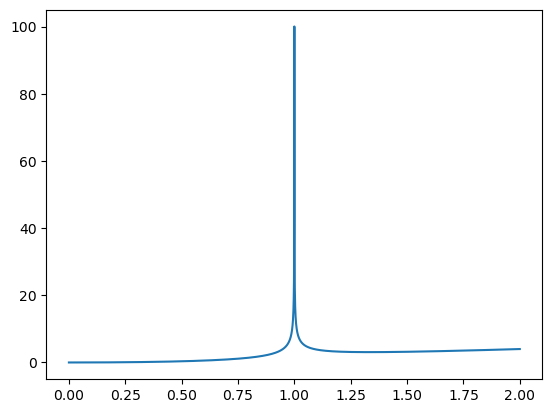

In [5]:
# a)
def f(x):
    return x ** 2 / np.sqrt(np.abs(x - 1))

x = np.linspace(0, 2, 10000)
y = f(x)
plt.plot(x, y)
plt.show()


In [12]:
# b)
result, error = integrate.quad(f, 0, 2)
print(result)

nan


/var/folders/sj/5j1ch75533d7g5jxl3jnnff40000gn/T/ipykernel_28375/182448130.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return x ** 2 / np.sqrt(np.abs(x - 1))
/var/folders/sj/5j1ch75533d7g5jxl3jnnff40000gn/T/ipykernel_28375/143856204.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, error = integrate.quad(f, 0, 2)
